## Final Project Submission

Please fill out:
* Student name: Matthew Lipman
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


#### Install Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import haversine as hs #geographic distance calculator

In [2]:
df_train = pd.read_csv('data/kc_house_data.csv')

In [3]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
print("Categorical Variables: waterfront, condition, grade, yr_built")
print("Numerical Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors")

Categorical Variables: waterfront, condition, grade, yr_built
Numerical Variables: bedrooms, bathrooms, sqft_living, sqft_lot, floors


In [5]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
print("RECOMMENDATION TO IGNORE THE FOLLOWING FEATURES: "
      "date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat   ",
      "long, sqft_living15, and sqft_lot15")

RECOMMENDATION TO IGNORE THE FOLLOWING FEATURES: date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat    long, sqft_living15, and sqft_lot15


### Examination of the variable of interest: 'price'

Distribution appears to deviate slightly from a normal distribution.
Displays a positive skewness.
Skewness: 4.023364652271239
Kurtosis: 34.54135857673376


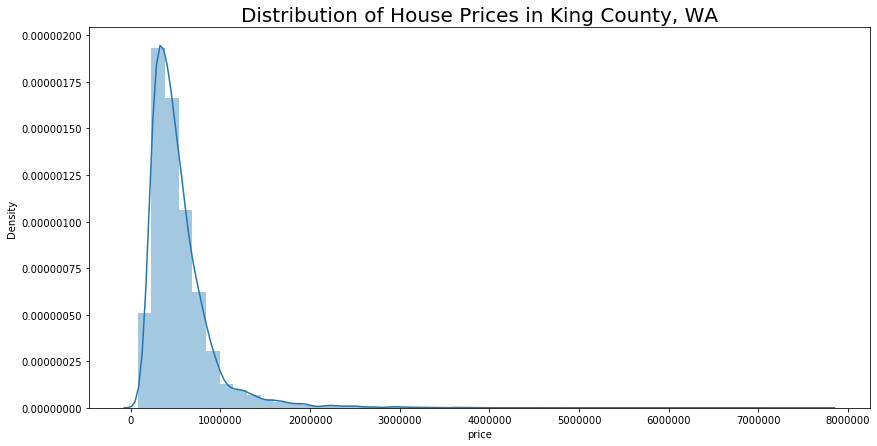

In [7]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['price'])
plt.title("Distribution of House Prices in King County, WA", fontsize=20);
print("Distribution appears to deviate slightly from a normal distribution.")
print("Displays a positive skewness.")
print("Skewness:", df_train['price'].skew())
print("Kurtosis:", df_train['price'].kurt())

### Relationship with numerical variables

##### Scatter plots of "recommended" variables against price

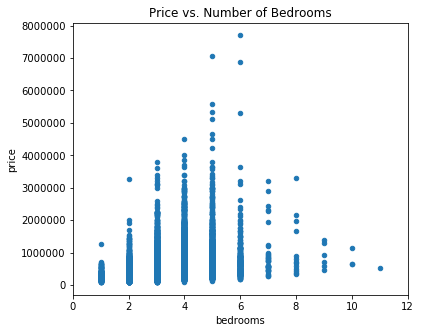

In [8]:
#bedrooms
plot1 = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
plot1.plot.scatter(x='bedrooms', y='price', figsize=(6,5), xlim=(0,12))
plt.title("Price vs. Number of Bedrooms");

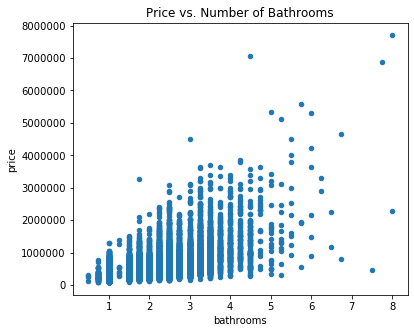

In [9]:
#bathrooms
plot1 = pd.concat([df_train['price'], df_train['bathrooms']], axis=1)
plot1.plot.scatter(x='bathrooms', y='price', figsize=(6,5))
plt.title("Price vs. Number of Bathrooms");

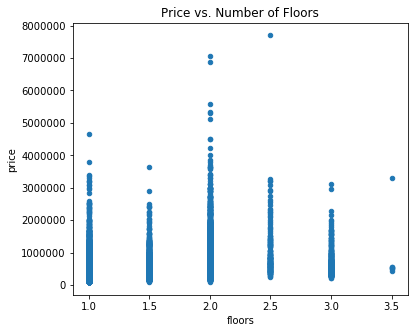

In [10]:
#floors
plot1 = pd.concat([df_train['price'], df_train['floors']], axis=1)
plot1.plot.scatter(x='floors', y='price', figsize=(6,5))
plt.title("Price vs. Number of Floors");

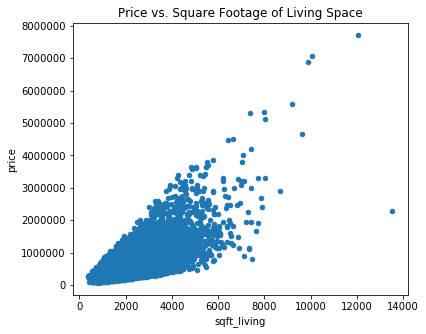

In [11]:
#sqft_living
plot1 = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
plot1.plot.scatter(x='sqft_living', y='price', figsize=(6,5))
plt.title("Price vs. Square Footage of Living Space");

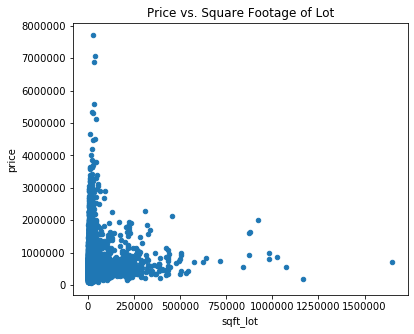

In [12]:
#sqft_lot
plot1 = pd.concat([df_train['price'], df_train['sqft_lot']], axis=1)
plot1.plot.scatter(x='sqft_lot', y='price', figsize=(6,5))
plt.title("Price vs. Square Footage of Lot");

### Relationship with categorical variables

##### Box plots of "recommended" variables against price

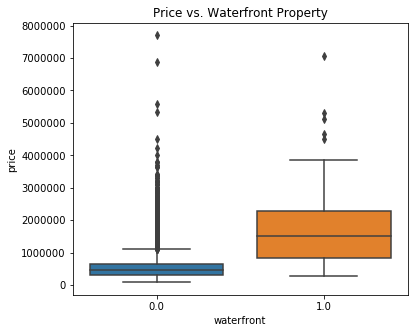

In [13]:
#waterfront
plot1 = pd.concat([df_train['price'], df_train['waterfront']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x='waterfront', y='price', data=plot1)
plt.title("Price vs. Waterfront Property");

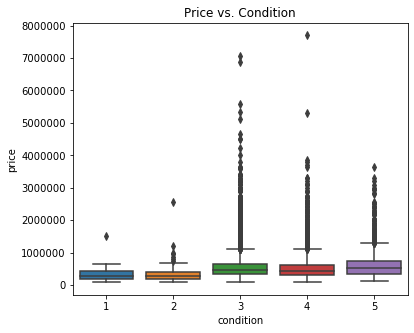

In [14]:
#condition
plot1 = pd.concat([df_train['price'], df_train['condition']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x='condition', y='price', data=plot1)
plt.title("Price vs. Condition");

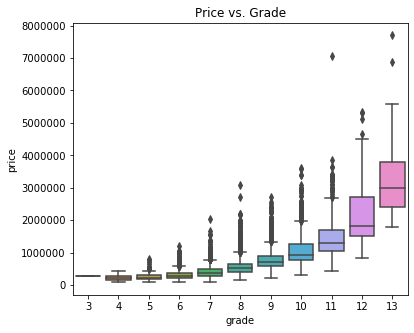

In [15]:
#grade
plot1 = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x='grade', y='price', data=plot1)
plt.title("Price vs. Grade");

NOTES: Too many bins. It would be more visually appealing to see price vs decade built.


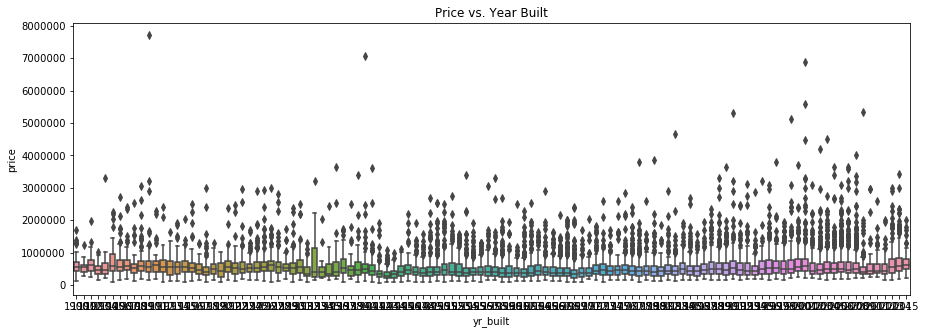

In [16]:
#yr_built
plot1 = pd.concat([df_train['price'], df_train['yr_built']], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x='yr_built', y='price', data=plot1)
plt.title("Price vs. Year Built");
print("NOTES: Too many bins. It would be more visually appealing to see price vs decade built.")

### Examination of variable correlations

In [17]:
#Remove unwanted columns
drop_vars = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated',
             'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df_train_mvp = df_train.drop(columns=drop_vars)

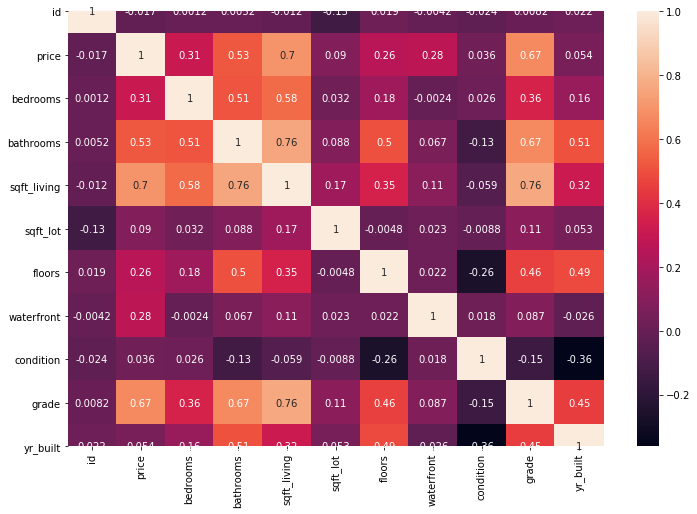

In [18]:
#correlation matrix of
corrmat = df_train_mvp.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, annot=True);

## Location of a Church of Scientology as a feature

In [19]:
#locations pulled from scientology-seattle.org
church_of_scientology_mission = (47.818100, -122.315430)
church_of_scientology_washington = (47.622380, -122.361020)
church_of_scientology_life_improvement_center = (47.615060, -122.327580)

In [20]:
#function that finds the latitudinal distance from the church
def distance_to_scientology(latitudes, church):
    dist_scientology_washington = []
    for lat in latitudes:
        dist_scientology_washington.append(np.abs(lat - church[0]))
    return dist_scientology_washington

dist_lat_scientology_washington = distance_to_scientology(df_train['lat'], church_of_scientology_washington)
dist_lat_scientology_mission = distance_to_scientology(df_train['lat'], church_of_scientology_mission)
dist_lat_scientology_life = distance_to_scientology(df_train['lat'], church_of_scientology_life_improvement_center)

In [21]:
#function that finds the longitudinal distance from the church
def distance_to_scientology(longitudes, church):
    dist_scientology_washington = []
    for long in longitudes:
        dist_scientology_washington.append(np.abs(long - church[1]))
    return dist_scientology_washington

dist_lat_scientology_washington = distance_to_scientology(df_train['long'], church_of_scientology_washington)
dist_lat_scientology_mission = distance_to_scientology(df_train['long'], church_of_scientology_mission)
dist_lat_scientology_life = distance_to_scientology(df_train['long'], church_of_scientology_life_improvement_center)

In [22]:
#converting lists to Pandas DataFrames
df_lat_scientology_w = pd.DataFrame(dist_lat_scientology_washington)
df_lat_scientology_m = pd.DataFrame(dist_lat_scientology_mission)
df_lat_scientology_l = pd.DataFrame(dist_lat_scientology_life)

#creating new columns in the main dataframe of latitudinal differences and longitudinal differences 
#from house to churches
df_train['lat_scientology_w'] = df_lat_scientology_w
df_train['lat_scientology_m'] = df_lat_scientology_m
df_train['lat_scientology_l'] = df_lat_scientology_l

In [23]:
#function that identifies the distance between a point of interest and house 
def distance_to(point_of_interest):
    distance = df_train[['lat','long']].apply(lambda x: hs.haversine(x.tolist(), point_of_interest), axis=1)
    return distance

In [24]:
#creating new columns of distances from houses to point of interest
df_train['distance_to_scientology_m'] = distance_to(church_of_scientology_mission)
df_train['distance_to_scientology_w'] = distance_to(church_of_scientology_washington)
df_train['distance_to_scientology_l'] = distance_to(church_of_scientology_life_improvement_center)
df_train['closest_distance_to_scientology'] = df_train[['distance_to_scientology_m',
                                                        'distance_to_scientology_w',
                                                        'distance_to_scientology_l']].min(axis=1)

Distribution appears to deviate slightly from a normal distribution.
Displays a positive skewness.
Skewness: 0.8119816020278896
Kurtosis: 0.1550669496730026


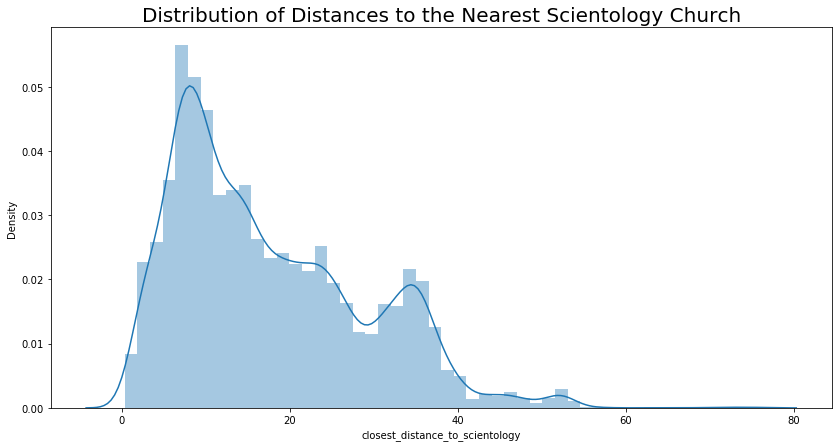

In [25]:
plt.figure(figsize=(14,7))
sns.distplot(df_train['closest_distance_to_scientology'])
plt.title("Distribution of Distances to the Nearest Scientology Church", fontsize=20);
print("Distribution appears to deviate slightly from a normal distribution.")
print("Displays a positive skewness.")
print("Skewness:", df_train['closest_distance_to_scientology'].skew())
print("Kurtosis:", df_train['closest_distance_to_scientology'].kurt())

### Mapping the relationship between house price and distance to nearest scientology church

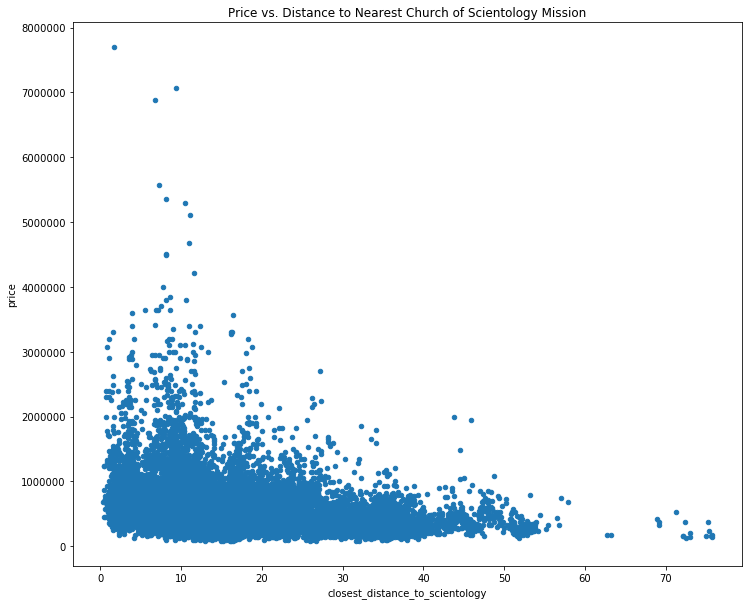

In [26]:
#church of scientology 
plot1 = pd.concat([df_train['price'], df_train['closest_distance_to_scientology']], axis=1)
plot1.plot.scatter(x='closest_distance_to_scientology', y='price', figsize=(12,10))
plt.title("Price vs. Distance to Nearest Church of Scientology Mission");